<a href="https://colab.research.google.com/github/vu-bigdata-2020/example-notebooks/blob/master/Example_Infra__AWS_MySql_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MySql infrastructure connection example

This example will show you how to install MySql on AWS, load data into the MySql and then connect to it from a jupyter notebook running on google colab. 

After this instruction is complete you should be able to load bigger datasets as well.

Prerequisite:

1.   We expect that you have received EC2 invitation from the Topics in Big data class and you have accepted the invitation. Refer to the next section to learn how to create an RDS instance

#MySql RDS instance creation

Please refer to the step by step instruction given in the amazon link below -

    https://aws.amazon.com/getting-started/tutorials/create-mysql-db/


PS: Please install the MS Visual studion C++ 2015 redistributable required for MySql Workbench in the below link:

    https://www.microsoft.com/en-us/download/details.aspx?id=48145



#Loading the data into MySql

1.Load the lahman data into mysql  from
    http://www.seanlahman.com/files/database/

PS:Use the lahman_sql_2015 data 

2.Using MySql workbench load the lahman_2014beta.sql script to load the data into MySql- 

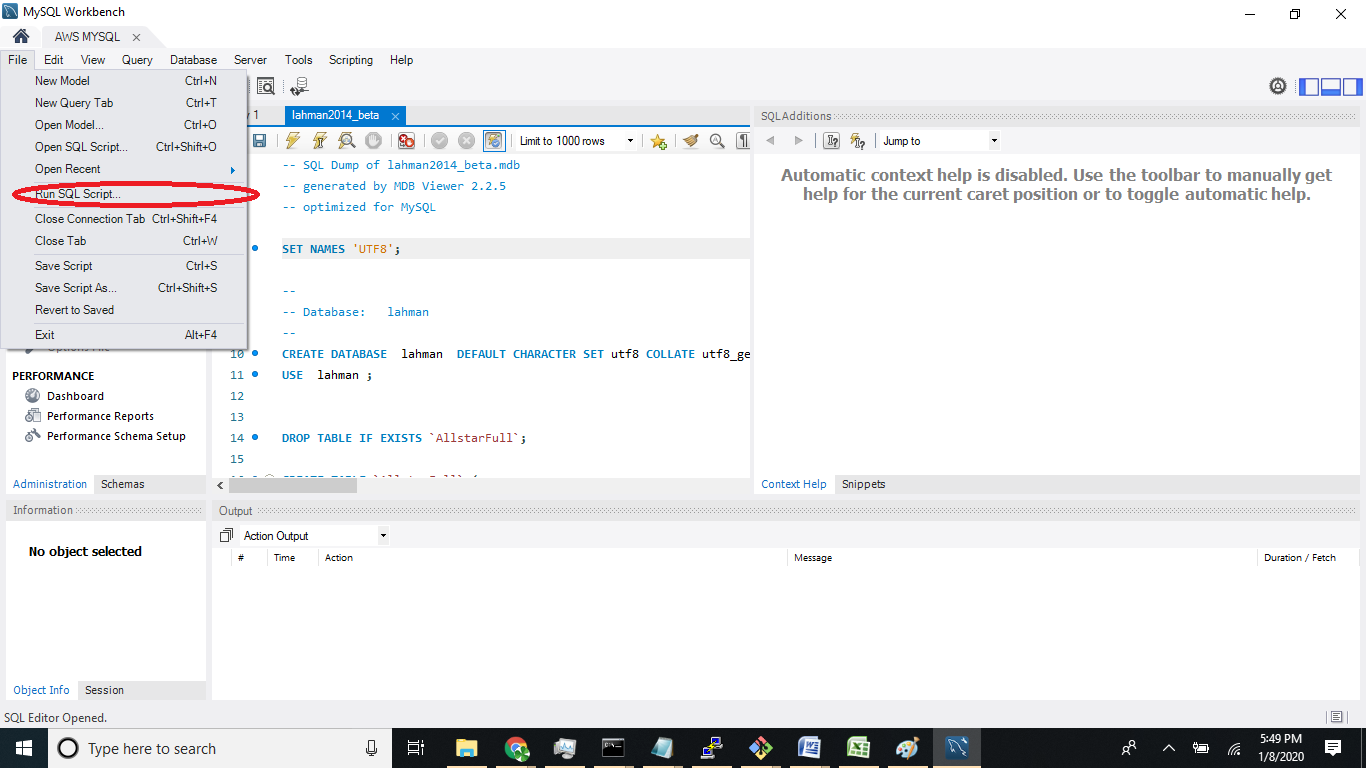


#Running the python code to connect to AWS MySql:

Run the Example_Infra+AWS_MySql.ipynb 


In [2]:
!pip install pymysql


     |████████████████████████████████| 51kB 930kB/s 


# DB class

DB class which connects to the AWS MySql server

In [16]:


import pymysql


class DB:
    def __init__(self):
        try:
          self.conn = pymysql.connect(
              user='admin',
              password='mysqlmysql',
              host='database-3.cru0oxwnnqay.us-east-1.rds.amazonaws.com'
              #database='mydb'
          )

        except Exception as e:
            print("I am unable to connect to the database - bye " + str(e))
            exit()
        print('Got a DB connection!- hurray')
        self.cur = self.conn.cursor()

    def cursor(self):
        return self.cur

    def getNewCursor(self):
        return self.conn.cursor()

    def connection(self):
        return self.conn

    def query(self, q):
        self.cur.execute(q)
        try:
          output=self.cur.fetchone()
          return self.cur.fetchall()
        except Exception as e:
          print('no result to return')
          return
          




Got a DB connection!- hurray
Success! I ran a query and got 23 results
(('Appearances',), ('AwardsManagers',), ('AwardsPlayers',), ('AwardsShareManagers',), ('AwardsSharePlayers',), ('Batting',), ('BattingPost',), ('CollegePlaying',), ('Fielding',), ('FieldingOF',), ('FieldingPost',), ('HallOfFame',), ('Managers',), ('ManagersHalf',), ('Master',), ('Pitching',), ('PitchingPost',), ('Salaries',), ('Schools',), ('SeriesPost',), ('Teams',), ('TeamsFranchises',), ('TeamsHalf',))


#The Main function

The main function uses DB class to run queries


In [17]:
def main():
    db1 = DB()

    q = 'use lahman;'
    db1.query(q)
    #db1.connection().commit()
    
    q = 'show tables;'
    res=db1.query(q)
    #db1.connection().commit()
    print('Success! I ran a query and got {} results'.format(len(db1.query(q))))
    print(res)
    return

    

if __name__ == '__main__':
    main()

Got a DB connection!- hurray
Success! I ran a query and got 23 results
(('Appearances',), ('AwardsManagers',), ('AwardsPlayers',), ('AwardsShareManagers',), ('AwardsSharePlayers',), ('Batting',), ('BattingPost',), ('CollegePlaying',), ('Fielding',), ('FieldingOF',), ('FieldingPost',), ('HallOfFame',), ('Managers',), ('ManagersHalf',), ('Master',), ('Pitching',), ('PitchingPost',), ('Salaries',), ('Schools',), ('SeriesPost',), ('Teams',), ('TeamsFranchises',), ('TeamsHalf',))
